<a href="https://colab.research.google.com/github/heet25itachi/TIMEPASS_BUDDY/blob/main/Core-Satellite%20Portfolio%20Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter Initial Investment Amount (e.g., 10000): 2000
Enter Core (Large-Cap) Allocation % (e.g., 70): 15
Rebalance Annually? (Y/N): 12

--- Running Simulation for 10 Years ---
Initial Investment: $2,000.00
Allocation: Core (15%), Satellite (85%)
Rebalancing: No

Year  1: Total Value: $  2,220.03 | Core Pct: 14.79% | Status: No Rebalance
Year  2: Total Value: $  2,492.73 | Core Pct: 14.39% | Status: No Rebalance
Year  3: Total Value: $  2,794.26 | Core Pct: 14.01% | Status: No Rebalance
Year  4: Total Value: $  3,113.21 | Core Pct: 13.67% | Status: No Rebalance
Year  5: Total Value: $  3,457.23 | Core Pct: 13.37% | Status: No Rebalance
Year  6: Total Value: $  3,876.45 | Core Pct: 13.04% | Status: No Rebalance
Year  7: Total Value: $  4,322.73 | Core Pct: 12.77% | Status: No Rebalance
Year  8: Total Value: $  4,806.50 | Core Pct: 12.53% | Status: No Rebalance
Year  9: Total Value: $  5,366.34 | Core Pct: 12.21% | Status: No Rebalance
Year 10: Total Value: $  5,970.31 | Core Pct: 11.97% | 

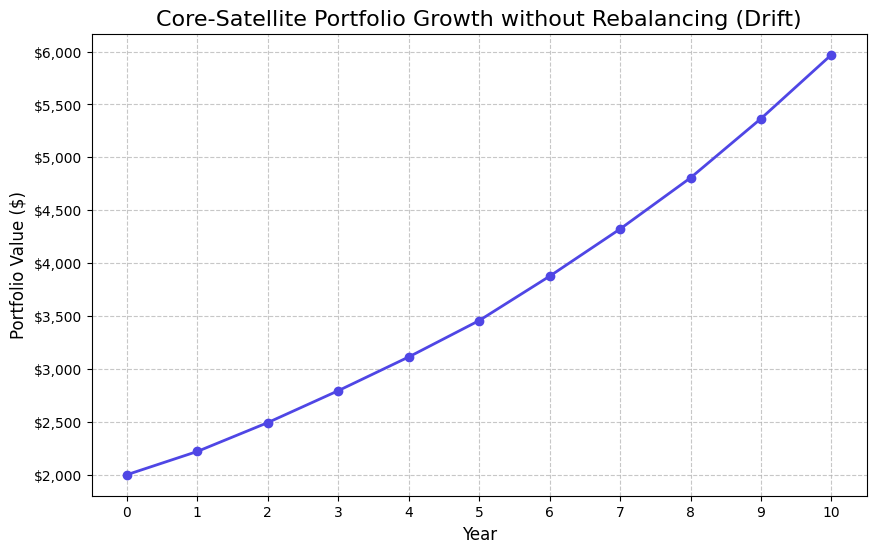

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# --- Configuration Constants (Assumptions based on historical averages) ---

# Large-Cap (Core) Assumptions
LARGE_CAP_AVG_RETURN = 0.09  # 9% average return
LARGE_CAP_VOLATILITY = 0.05  # Returns vary by +/- 5% of the average (i.e., 8.55% to 9.45%)

# Small-Cap (Satellite) Assumptions
SMALL_CAP_AVG_RETURN = 0.12  # 12% average return
SMALL_CAP_VOLATILITY = 0.10  # Returns vary by +/- 10% of the average (i.e., 10.8% to 13.2%)

SIMULATION_YEARS = 10


def get_simulated_return(avg_return, volatility):
    """Generates a random annual return based on average return and volatility."""
    min_return = avg_return * (1 - volatility)
    max_return = avg_return * (1 + volatility)

    # Use uniform distribution for simplicity in simulation
    return np.random.uniform(min_return, max_return)


def simulate_portfolio(initial_investment, core_target_pct, rebalance_annually):
    """
    Runs the Core-Satellite portfolio simulation over 10 years.

    Args:
        initial_investment (float): The starting capital.
        core_target_pct (float): Target allocation percentage for the Core (e.g., 0.7 for 70%).
        rebalance_annually (bool): Whether to reset allocations to target weights each year.

    Returns:
        tuple: (list of total annual values, final portfolio value)
    """
    satellite_target_pct = 1.0 - core_target_pct

    # Initialize values
    core_value = initial_investment * core_target_pct
    satellite_value = initial_investment * satellite_target_pct
    total_value = initial_investment

    # History tracking
    total_history = [total_value]

    print(f"\n--- Running Simulation for {SIMULATION_YEARS} Years ---")
    print(f"Initial Investment: ${initial_investment:,.2f}")
    print(f"Allocation: Core ({core_target_pct*100:.0f}%), Satellite ({satellite_target_pct*100:.0f}%)")
    print(f"Rebalancing: {'Yes' if rebalance_annually else 'No'}\n")

    for year in range(1, SIMULATION_YEARS + 1):
        # 1. Apply Returns (End of Year)
        core_return = get_simulated_return(LARGE_CAP_AVG_RETURN, LARGE_CAP_VOLATILITY)
        satellite_return = get_simulated_return(SMALL_CAP_AVG_RETURN, SMALL_CAP_VOLATILITY)

        core_value *= (1 + core_return)
        satellite_value *= (1 + satellite_return)

        total_value = core_value + satellite_value

        # 2. Check for Rebalancing (Start of Next Year)
        if rebalance_annually and year < SIMULATION_YEARS:
            # Calculate the target amounts based on the new total value
            target_core_value = total_value * core_target_pct
            target_satellite_value = total_value * satellite_target_pct

            # Execute the rebalance trade
            core_value = target_core_value
            satellite_value = target_satellite_value

            rebalance_status = "Rebalanced"
        else:
            rebalance_status = "No Rebalance"

        total_history.append(total_value)

        # Print annual summary
        print(f"Year {year:2}: Total Value: ${total_value:10,.2f} | Core Pct: {core_value / total_value * 100:.2f}% | Status: {rebalance_status}")

    return total_history, total_value


def main():
    """Gathers user input and runs the portfolio simulation."""
    try:
        # --- Get User Inputs ---
        initial_investment = float(input("Enter Initial Investment Amount (e.g., 10000): "))
        if initial_investment <= 0:
            raise ValueError("Investment must be positive.")

        core_allocation_percent = float(input("Enter Core (Large-Cap) Allocation % (e.g., 70): "))
        if not (50 <= core_allocation_percent <= 90):
            print("Warning: Core allocation typically ranges from 50% to 90% in this strategy.")

        rebalance_input = input("Rebalance Annually? (Y/N): ").strip().upper()
        rebalance_annually = rebalance_input == 'Y'

        core_target_pct = core_allocation_percent / 100.0

        # --- Run Simulation ---
        total_history, final_value = simulate_portfolio(
            initial_investment,
            core_target_pct,
            rebalance_annually
        )

        # --- Display Final Results ---
        total_return_pct = (final_value / initial_investment - 1) * 100

        print("\n" + "="*50)
        print(f"FINAL PORTFOLIO VALUE AFTER {SIMULATION_YEARS} YEARS:")
        print(f"    ${final_value:,.2f}")
        print(f"TOTAL RETURN: {total_return_pct:.2f}%")
        print("="*50)

        # --- Plot Results ---
        years = np.arange(SIMULATION_YEARS + 1)

        # FIX: Removed stray character 'o' here.
        plt.figure(figsize=(10, 6))
        plt.plot(years, total_history, marker='o', linestyle='-', color='#4f46e5', linewidth=2)

        title_suffix = "with Annual Rebalancing" if rebalance_annually else "without Rebalancing (Drift)"
        plt.title(f'Core-Satellite Portfolio Growth {title_suffix}', fontsize=16)
        plt.xlabel('Year', fontsize=12)
        plt.ylabel('Portfolio Value ($)', fontsize=12)
        plt.xticks(years)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.ticklabel_format(style='plain', axis='y')
        plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))
        plt.show()

    except ValueError as e:
        print(f"\nError in input: {e}")
    except Exception as e:
        print(f"\nAn unexpected error occurred: {e}")

if __name__ == "__main__":
    main()
